In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Distribution plot for numeric columns
In seaborn, a distplot is a function that plots a histogram, kernel density estimate (KDE) plot, and/or rug plot on a single figure. It is used to visualize the distribution of a single continuous variable.

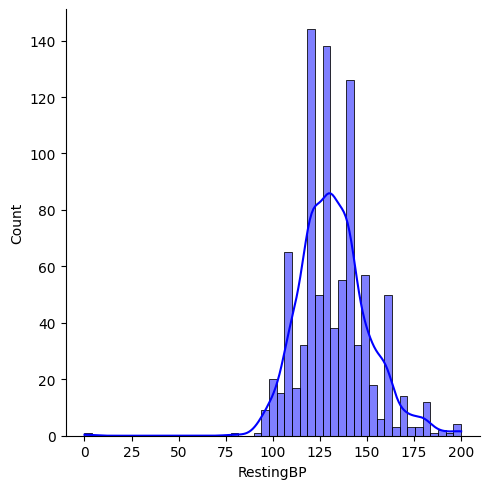

In [5]:
sns.displot(df['RestingBP'], kde = True, color = 'blue')

So after doing the visualization we can infer that minimum age is around 30 and maximum age is around 80. Maximum of the data falls within the range of 40 to 70.

## Pie Charts for Categorical Columns
A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice is proportional to the quantity it represents. Pie charts are generally used to show the distribution of a categorical variable.

<Axes: >

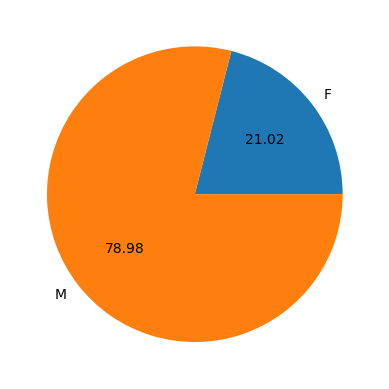

In [19]:
df.groupby('Sex').size().plot(kind = 'pie', autopct = "%.2f")

With the help of pie chart we can see that 78.98% of the people who are having heart disease are males and 21.02% are females in our dataset.

<Axes: >

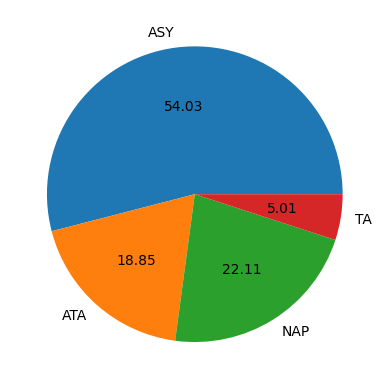

In [8]:
df.groupby('ChestPainType').size().plot(kind = 'pie', autopct = "%.2f")

With the help of pie chart we can see that 54.03% of the people are experiencing ASY, 22.11% are experiencing NAP, 18.85% are experiencing ATA, and 5.01% are experiencing TA

<Axes: >

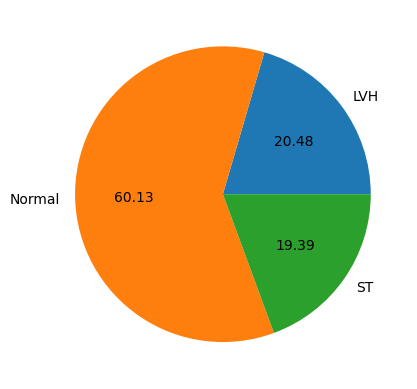

In [9]:
df.groupby('RestingECG').size().plot(kind = 'pie', autopct = "%.2f")

With the help of pie chart we can see that 60.13% of the people who are having normal RestingECG, 20.48% are having LVH, and 19.39% are having ST.

<Axes: >

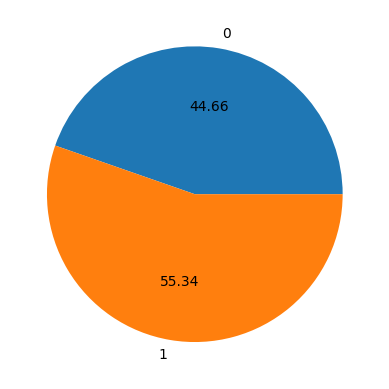

In [11]:
df.groupby('HeartDisease').size().plot(kind = 'pie', autopct = "%.2f")

With the help of pie chart we can see that 55.34% are having Heart Diesese and 44.56% are not having Heart Disease

## Violin Plot
In seaborn, a violinplot is a graphical representation of a continuous distribution, showing the probability density of the data at different values. It is a combination of a box plot and a kernel density plot, with a rotated kernel density plot on each side.

<Axes: xlabel='HeartDisease', ylabel='Sex'>

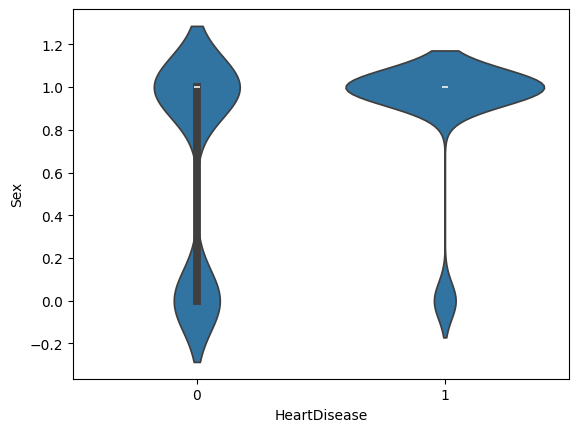

In [47]:
sns.violinplot(x = 'HeartDisease', y = 'Sex', data = df)

So from this we can see there are more males who are having the chances of having a heart disease compared to females. It can also be flawed as the number of males are more in this dataset.

## Correlation-HeatMap
A correlation heatmap is a graphical representation of the correlation matrix of a dataset, which shows the correlation coefficients between the different variables in the dataset. The values in the matrix are represented as colors, with darker colors indicating a stronger positive or negative correlation.

The values in the matrix are the Pearson correlation coefficients between the different variables, with 1 indicating a strong positive correlation, -1 indicating a strong negative correlation, and 0 indicating no correlation. The colors in the heatmap represent the strength of the correlation, with darker colors indicating a stronger correlation.

In [29]:
df_new = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]

In [30]:
df_new.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

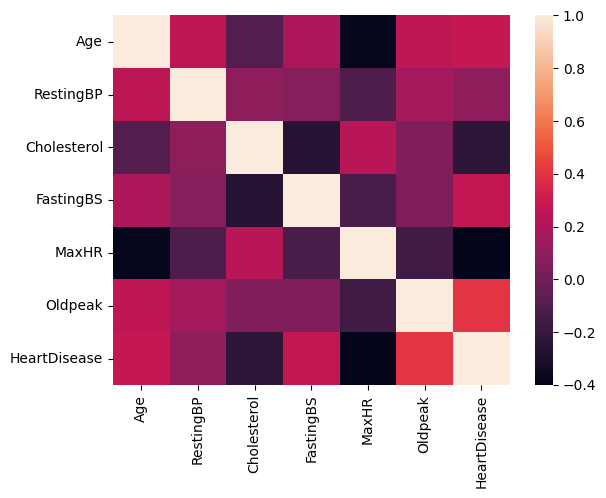

In [31]:
sns.heatmap(df_new.corr())

## Joint Plot
A correlation jointplot is a graphical representation of the joint distribution of two variables, along with their individual distributions. In seaborn, you can create a jointplot using the jointplot function.

The plot includes a scatterplot of the data, with a regression line showing the trend, as well as histograms or kernel density plots of the individual variables on the x- and y-axes.

You can customize the appearance of the jointplot by setting various options, such as the marker type, color map, and bin width. You can also specify the type of plot to use for the individual variables, such as a histogram or kernel density plot.

Jointplots are useful for visualizing the relationship between two variables and the individual distributions of the variables. They can also be used to identify patterns in the data and to estimate the strength of the relationship between the variables.

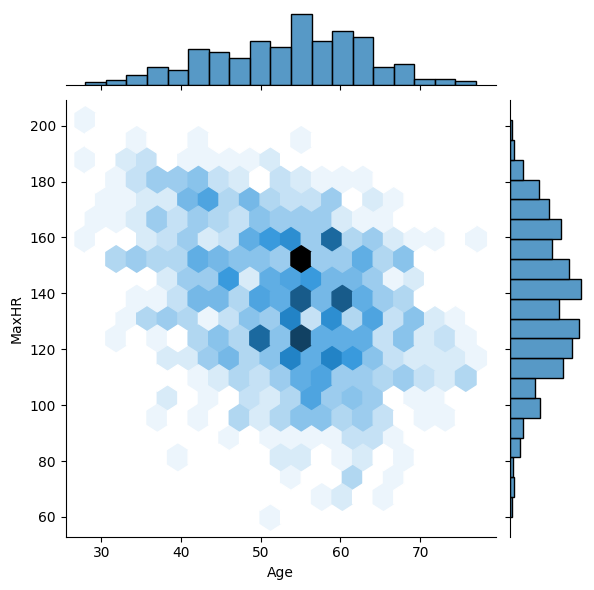

In [39]:
sns.jointplot(x = 'Age', y = 'MaxHR', data = df, kind = 'hex')

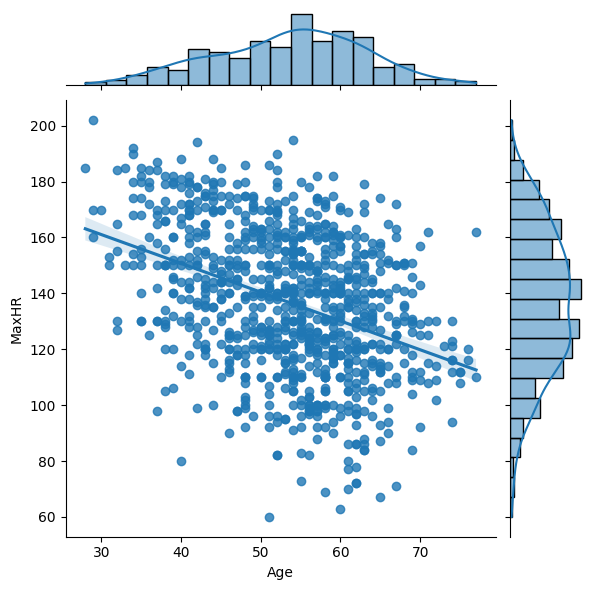

In [38]:
sns.jointplot(x = 'Age', y = 'MaxHR', data = df, kind = 'reg')

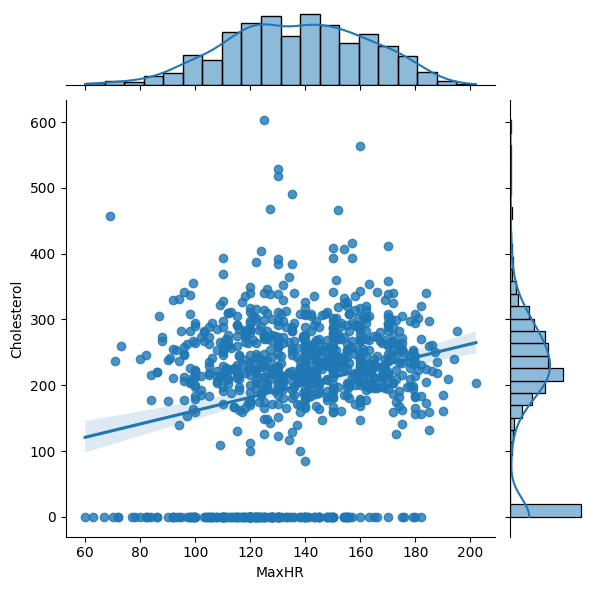

In [46]:
sns.jointplot(x = 'MaxHR', y = 'Cholesterol', data = df, kind = 'reg')

So from this we can see based on Cholesterol how the MaxHR is changing.

Pair Plot

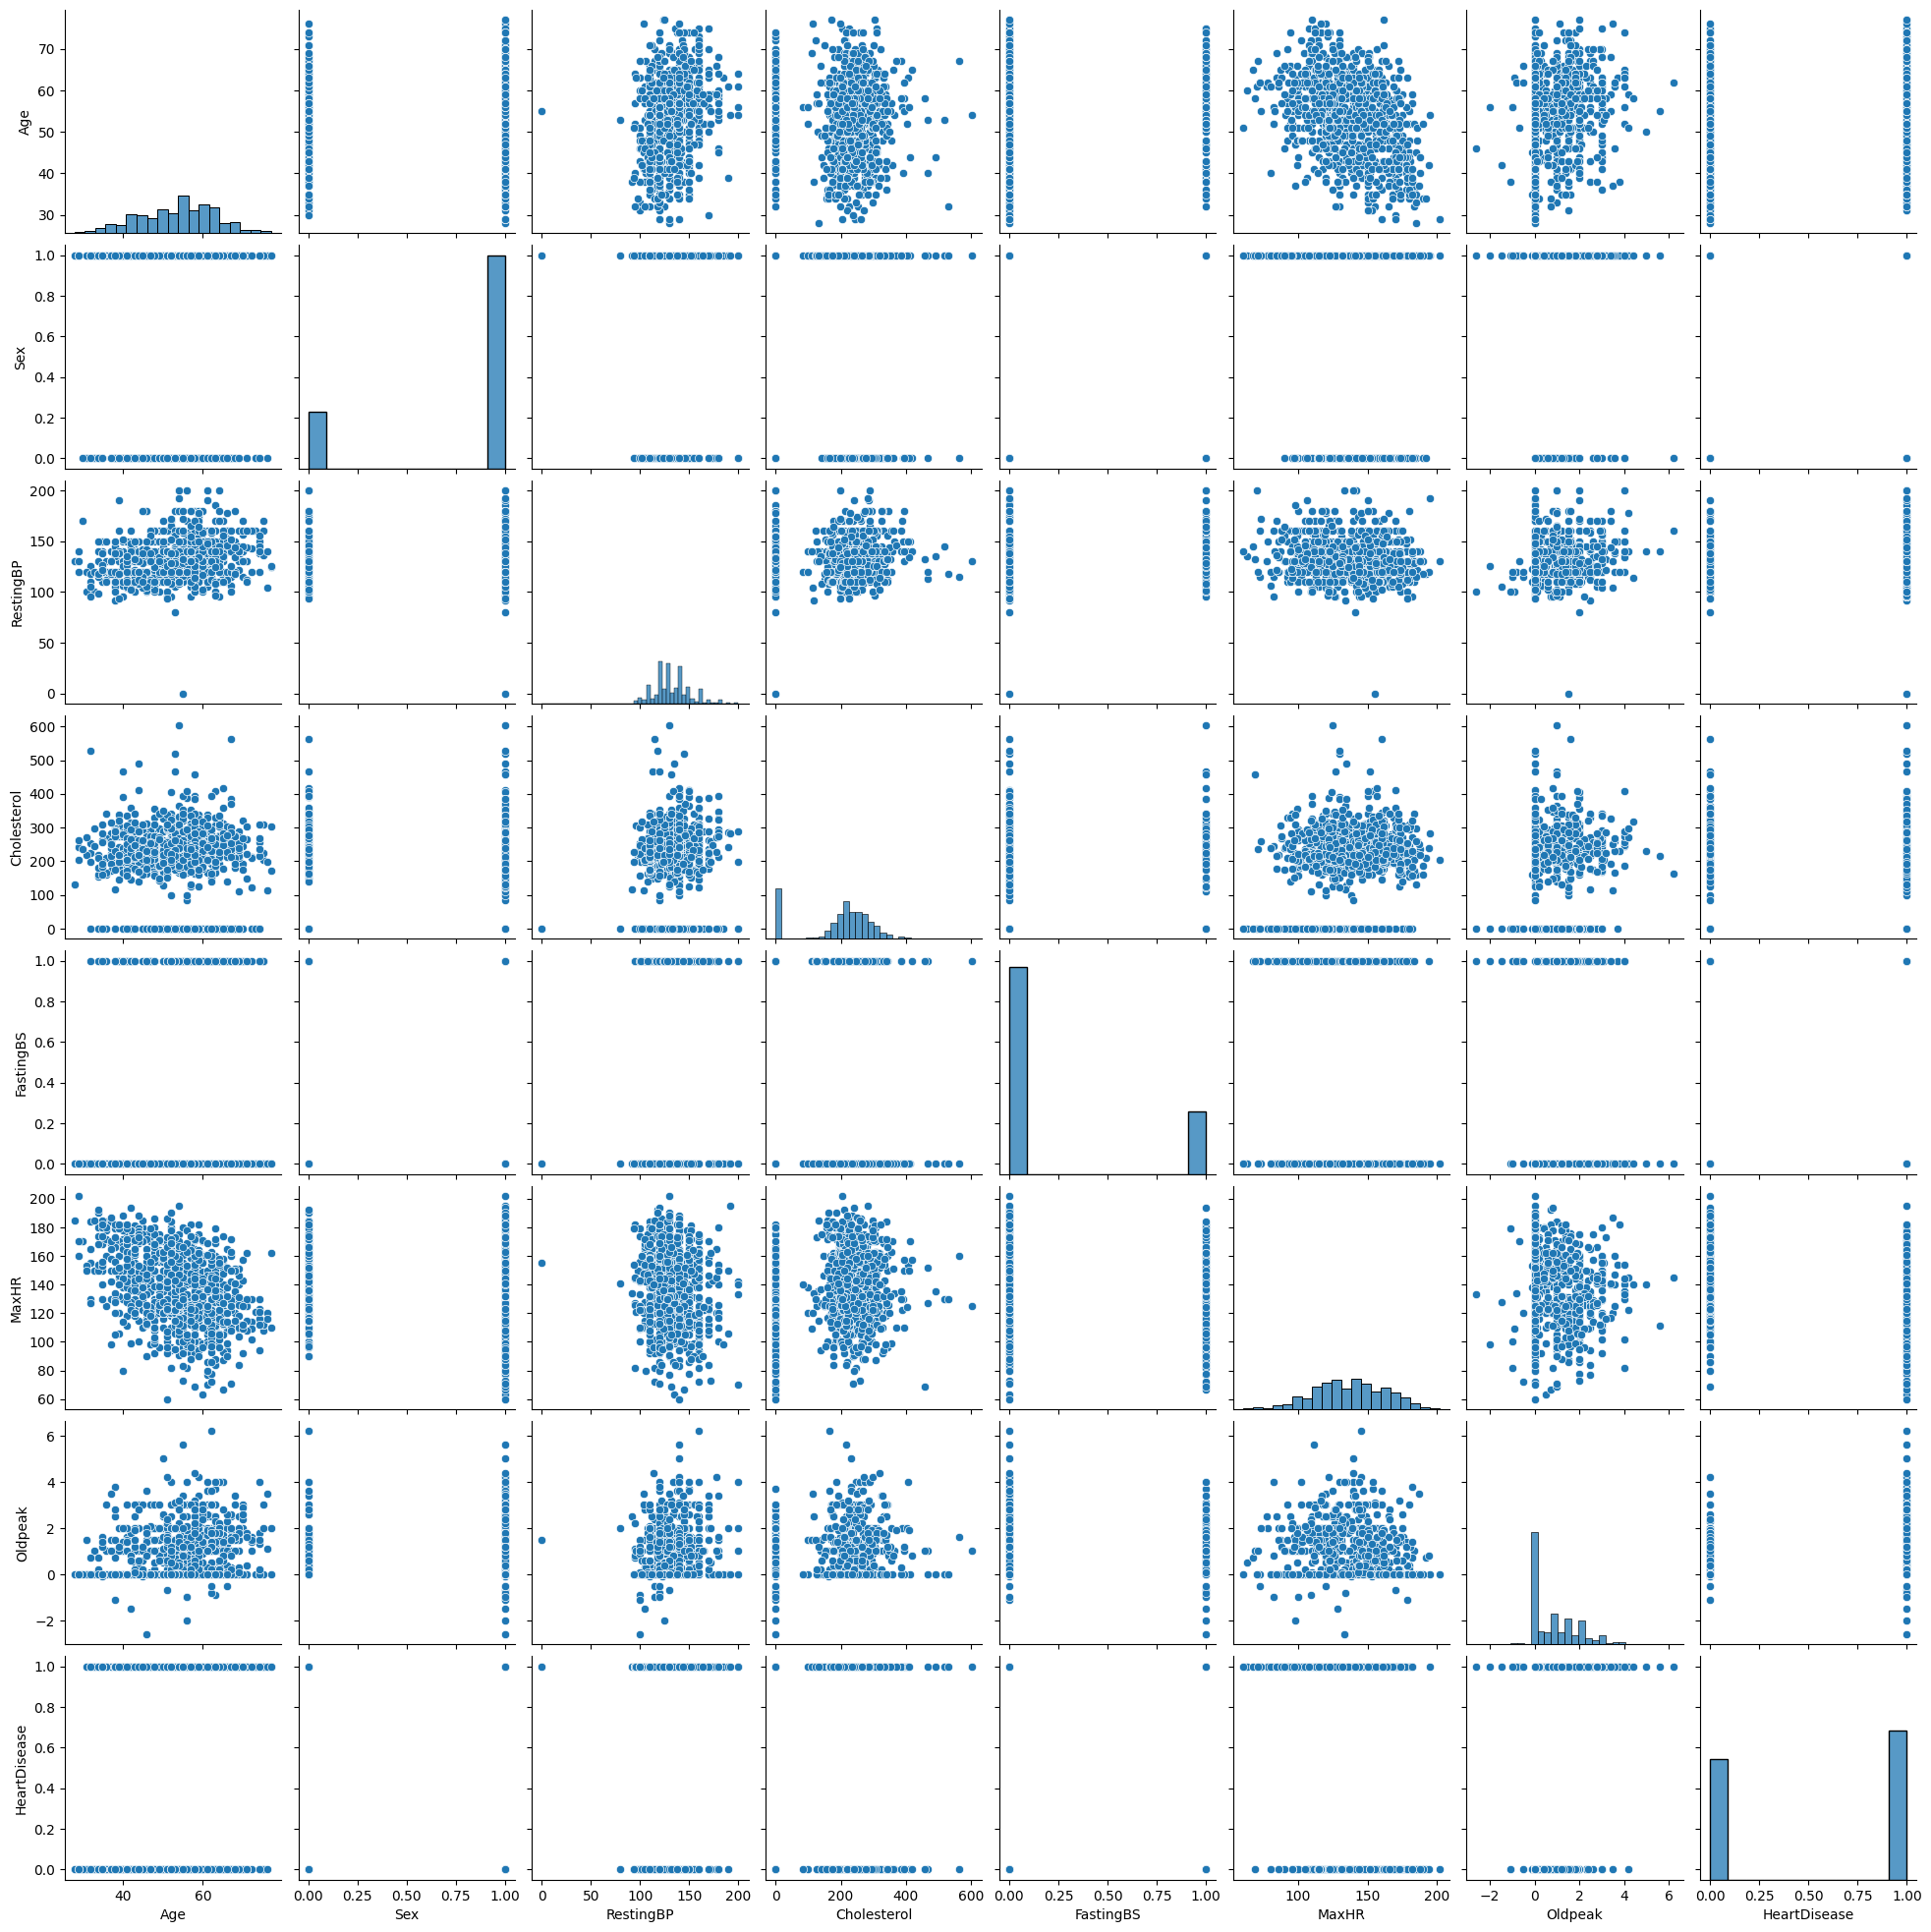

In [43]:
sns.pairplot(df)